In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [81]:
import mapclassify
import geopandas as gpd
%matplotlib inline

In [11]:
all_businesses = pd.read_csv('CSVs/all_businesses.csv', index_col=0, dtype={'zip_code': str})

In [13]:
closed = all_businesses[all_businesses.is_closed]

In [232]:
zipcodes_closed_nonagg = closed.loc[:, ['id', 'zip_code']].groupby('zip_code').count().sort_values('id', ascending=False)

In [233]:
zipcodes_closed_nonagg

,id
zip_code,
60622,57
60614,50
60607,47
60647,43
60618,40
60657,39
60625,32
60654,31
60611,31


In [ ]:
ax = sns.barplot("size", y="total_bill", data=tips, palette="Blues_d")

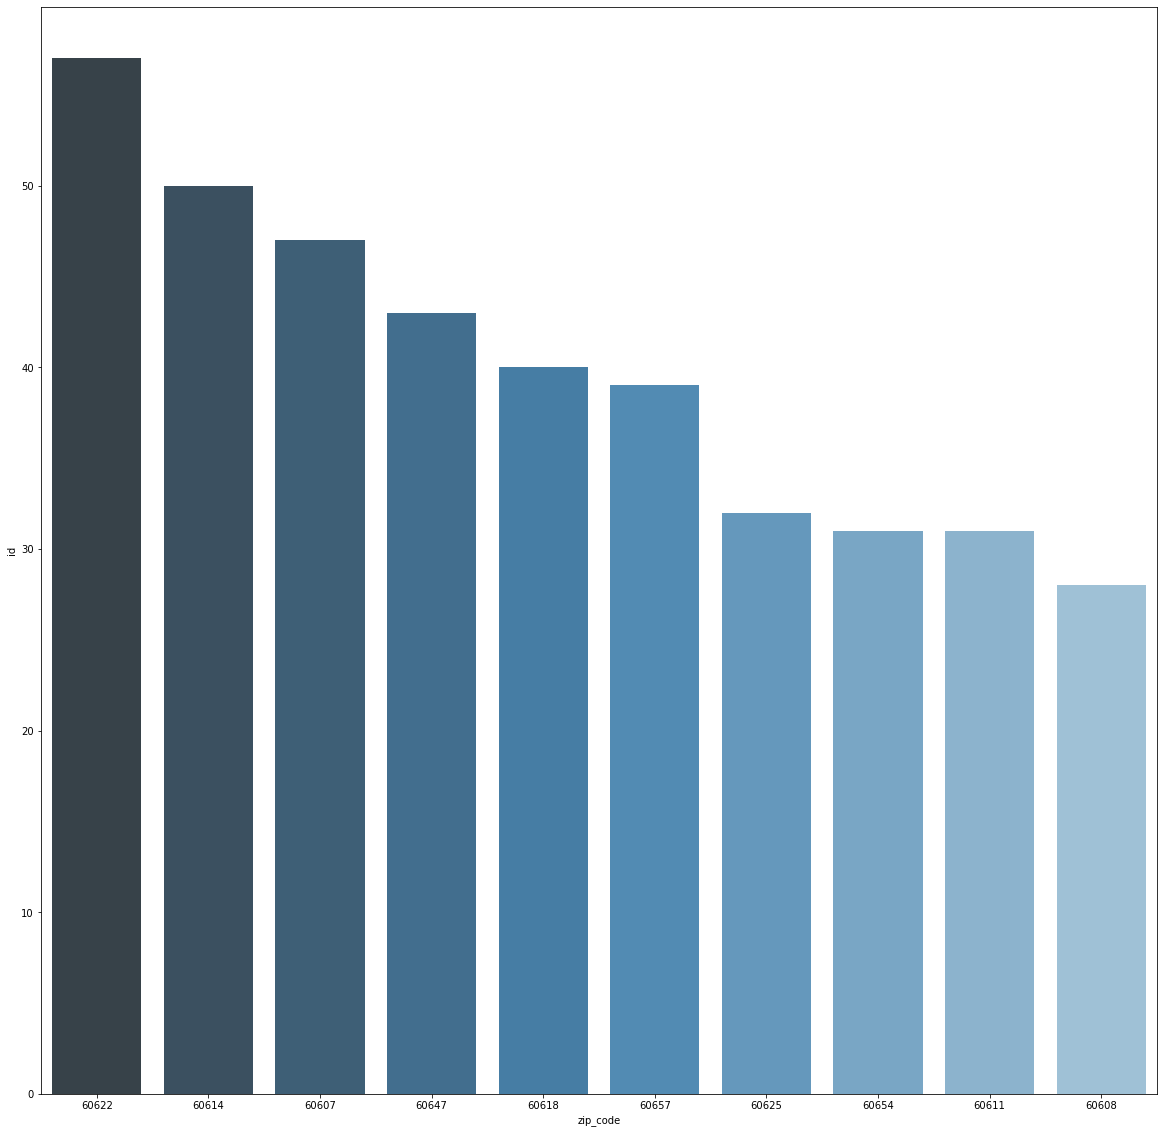

In [235]:
closed_by_zip_top10 = sns.barplot(x=zipcodes_closed_nonagg.index[:10], y=zipcodes_closed_nonagg.id[:10], palette="Blues_d", order=zipcodes_closed_nonagg.index[:10])
fig = closed_by_zip_top10.get_figure()
fig.savefig('top10closedzips.png')

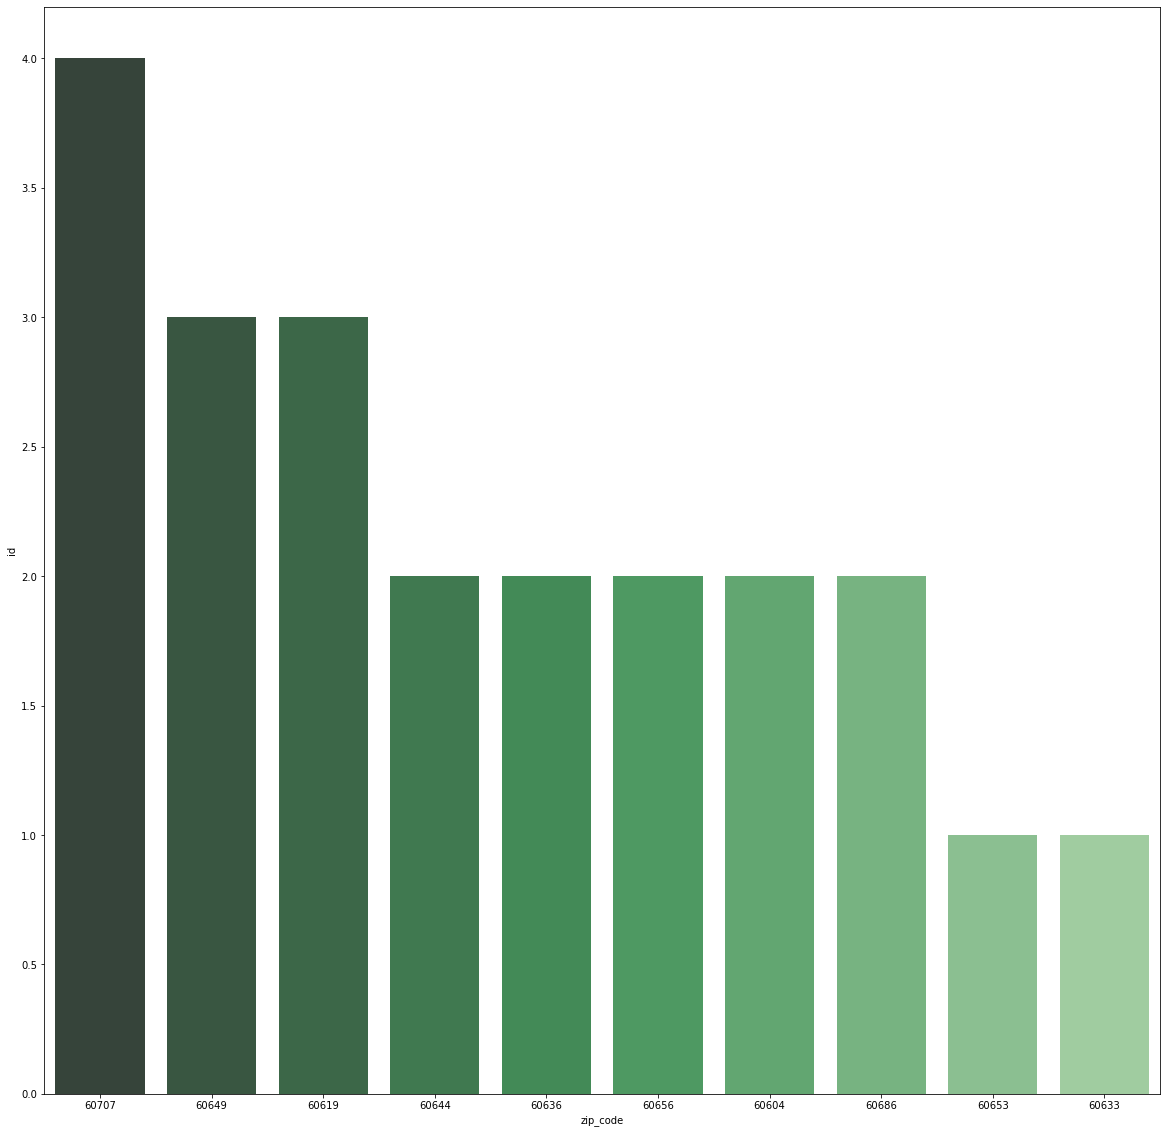

In [230]:
closed_by_zip_bottom10 = sns.barplot(x=zipcodes_closed.index[-12:-2], y=zipcodes_closed.id[-12:-2], palette="Greens_d", order=zipcodes_closed.index[-12:-2])
fig = closed_by_zip_top10.get_figure()
fig.savefig('bottom10closedzips.png')

In [60]:
_open = all_businesses[all_businesses.is_closed==False]

In [62]:
zipcodes_open = _open.loc[:, ['id', 'zip_code']].groupby('zip_code').count().sort_values('id', ascending=False)

In [74]:
zip_ratio_closed = zipcodes_open.merge(zipcodes_closed, left_index=True, right_index=True, how='right')

In [ ]:
zip_ratio_closed = zipcodes_open.merge(zipcodes_closed, left_index=True, right_index=True, how='right')
zip_ratio_closed['ratio_closed'] = zip_ratio_closed.id_y/zip_ratio_closed.id_x
zip_ratio_closed = zip_ratio_closed.iloc[:, [-1]]
zip_ratio_closed.sort_values('ratio_closed', ascending=False, inplace=True)

In [75]:
zip_ratio_closed['ratio_closed'] = zip_ratio_closed.id_y/zip_ratio_closed.id_x

In [76]:
zip_ratio_closed = zip_ratio_closed.iloc[:, [-1]]

In [78]:
zip_ratio_closed.sort_values('ratio_closed', ascending=False, inplace=True)

In [103]:
plt.rcParams['figure.figsize'] = (20, 20)

In [139]:
chicago = gpd.read_file('/Users/egemenpamukcu/Desktop/zipcodes1.geojson')
#uploaded to the git repo

In [155]:
chicago_zip_closed = chicago.merge(zip_ratio_closed, right_index=True, left_on='ZIP')

In [178]:
zipcodes_closed.loc[['60601', '60602', '60603', '60604', '60605', '60611'], :].id.sum()

79

In [182]:
zipcodes_closed.loc[['60606', '60607', '60661'], :].id.sum()

81.0

In [180]:
zipcodes_closed.at['12311', ['id']] = zipcodes_closed.loc[['60601', '60602', '60603', '60604', '60605', '60611'], :].id.sum()

In [183]:
zipcodes_closed.at['6761', ['id']] = zipcodes_closed.loc[['60606', '60607', '60661'], :].id.sum()

In [185]:
zipcodes_closed.at['60610', ['id']] = zipcodes_closed.loc[['60610', '60654'], :].id.sum()

In [189]:
zipcodes_closed.at['60622', ['id']] = zipcodes_closed.loc[['60622', '60622'], :].id.sum()

In [192]:
zipcodes_open.at['12311', ['id']] = zipcodes_open.loc[['60601', '60602', '60603', '60604', '60605', '60611'], :].id.sum()

In [193]:
zipcodes_open.at['6761', ['id']] = zipcodes_open.loc[['60606', '60607', '60661'], :].id.sum()

In [194]:
zipcodes_open.at['60610', ['id']] = zipcodes_open.loc[['60610', '60654'], :].id.sum()

In [195]:
zipcodes_open.at['60622', ['id']] = zipcodes_open.loc[['60622', '60622'], :].id.sum()

In [197]:
zip_ratio_closed1 = zipcodes_open.merge(zipcodes_closed, left_index=True, right_index=True, how='right')
zip_ratio_closed1['ratio_closed'] = zip_ratio_closed1.id_y/zip_ratio_closed1.id_x
zip_ratio_closed1 = zip_ratio_closed1.iloc[:, [-1]]
zip_ratio_closed1.sort_values('ratio_closed', ascending=False, inplace=True)

In [199]:
chicago_zip_closed1 = chicago.merge(zip_ratio_closed1, right_index=True, left_on='ZIP')

In [207]:
chicago_neighborhoods = gpd.read_file('/Users/egemenpamukcu/Desktop/chicago_boundaries.geojson')

In [219]:
chicago_neighborhoods["center"] = chicago_neighborhoods["geometry"].centroid
za_points = chicago_neighborhoods.copy()
za_points.set_geometry("center", inplace = True)

<ipython-input-219-28cc9f91c3c4>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  chicago_neighborhoods["center"] = chicago_neighborhoods["geometry"].centroid


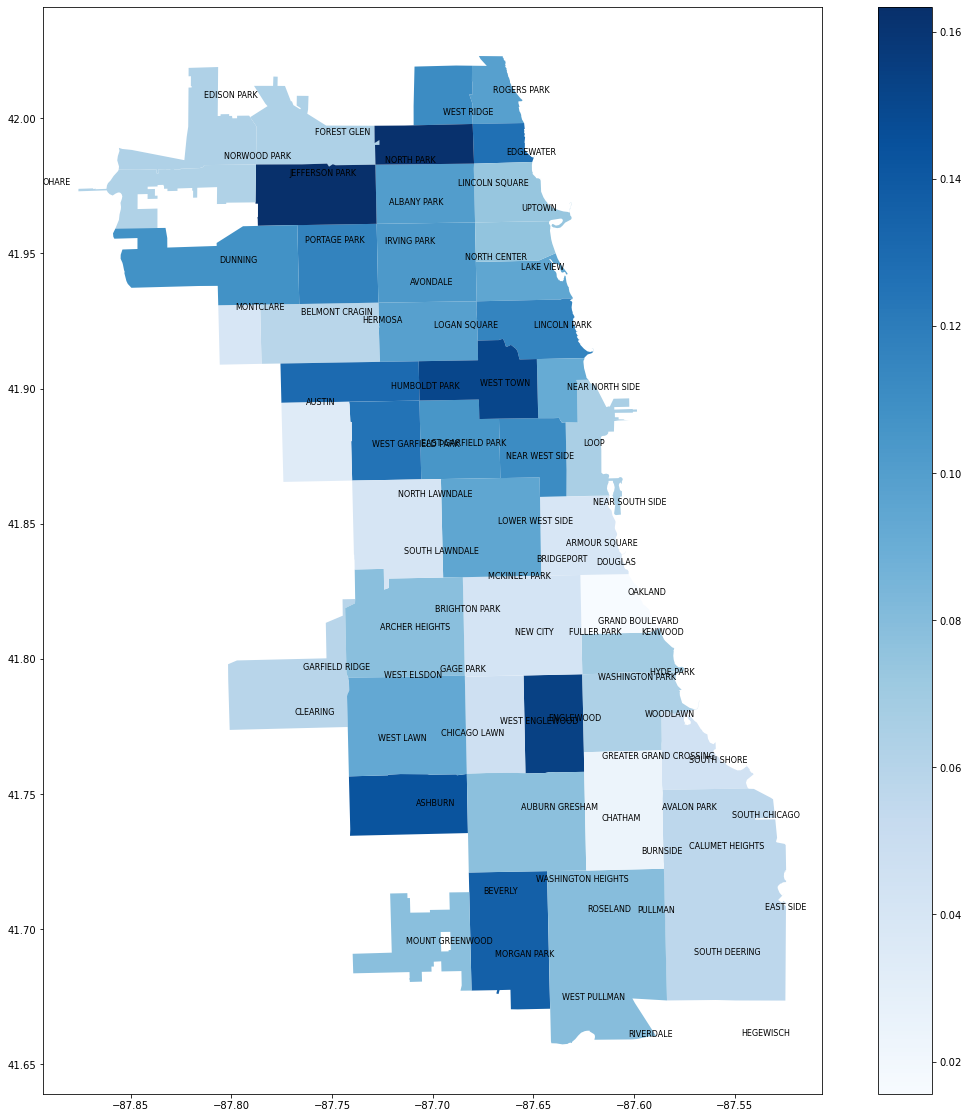

In [292]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_facecolor('white')
chicago_zip_closed1.plot(ax=ax, column=chicago_zip_closed1.ratio_closed, legend=True, cmap='Blues')
texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["community"]):
    texts.append(plt.text(x, y, label, fontsize = 8))
plt.savefig('ratio1.png')

In [253]:
all_businesses['death_rate'] = all_businesses.covid_deaths / all_businesses.zipcode_population
all_businesses['case_rate'] = all_businesses.covid_cases / all_businesses.zipcode_population

In [259]:
rates = all_businesses.loc[:, ['zip_code', 'death_rate', 'case_rate']].drop_duplicates('zip_code')

In [263]:
chicago_rates_zip = chicago_zip_closed1.merge(rates, left_on='ZIP', right_on='zip_code', how='left')

In [274]:
rates[rates.zip_code=='60601'].iat[0, 2]

0.05165247018739352

In [275]:
chicago_rates_zip.at[43, 'ZIP'] = 60601
chicago_rates_zip.at[43, 'death_rate'] = rates[rates.zip_code=='60601'].iat[0, 1]
chicago_rates_zip.at[43, 'case_rate'] = rates[rates.zip_code=='60601'].iat[0, 2]

chicago_rates_zip.at[44, 'ZIP'] = 60606
chicago_rates_zip.at[44, 'death_rate'] = rates[rates.zip_code=='60606'].iat[0, 1]
chicago_rates_zip.at[44, 'case_rate'] = rates[rates.zip_code=='60606'].iat[0, 2]

,ZIP,name,geometry,ratio_closed,center,zip_code,death_rate,case_rate
0,60647,None,"POLYGON ((-87.67762 41.91776, -87.67747 41.910...",0.098398,POINT (-87.70226 41.92110),60647,0.001474,0.075866
1,60639,None,"POLYGON ((-87.72683 41.92265, -87.72708 41.922...",0.058824,POINT (-87.75599 41.92046),60639,0.002132,0.129633
2,60707,None,"POLYGON ((-87.78500 41.90915, -87.80575 41.908...",0.039604,POINT (-87.79574 41.91996),60707,0.000767,0.041610
3,60651,None,"POLYGON ((-87.70656 41.89555, -87.77513 41.894...",0.130435,POINT (-87.74105 41.90241),60651,0.001787,0.095906
4,60638,None,"POLYGON ((-87.74347 41.81876, -87.74281 41.795...",0.059459,POINT (-87.76938 41.78917),60638,0.001633,0.105992
5,60652,None,"POLYGON ((-87.68305 41.75741, -87.68251 41.735...",0.142857,POINT (-87.71208 41.74605),60652,0.001868,0.094609
6,60626,None,"POLYGON ((-87.66421 42.02126, -87.66401 42.021...",0.098592,POINT (-87.66958 42.00900),60626,0.002876,0.065614
7,60645,None,"POLYGON ((-87.68838 42.01952, -87.68045 42.019...",0.111111,POINT (-87.69488 42.00846),60645,0.001865,0.075191
8,60660,None,"POLYGON ((-87.65460 41.99824, -87.65426 41.995...",0.126761,POINT (-87.66664 41.99063),60660,0.001364,0.046298
9,60640,None,"POLYGON ((-87.65054 41.98383, -87.65074 41.982...",0.073427,POINT (-87.66085 41.97155),60640,0.001822,0.048842


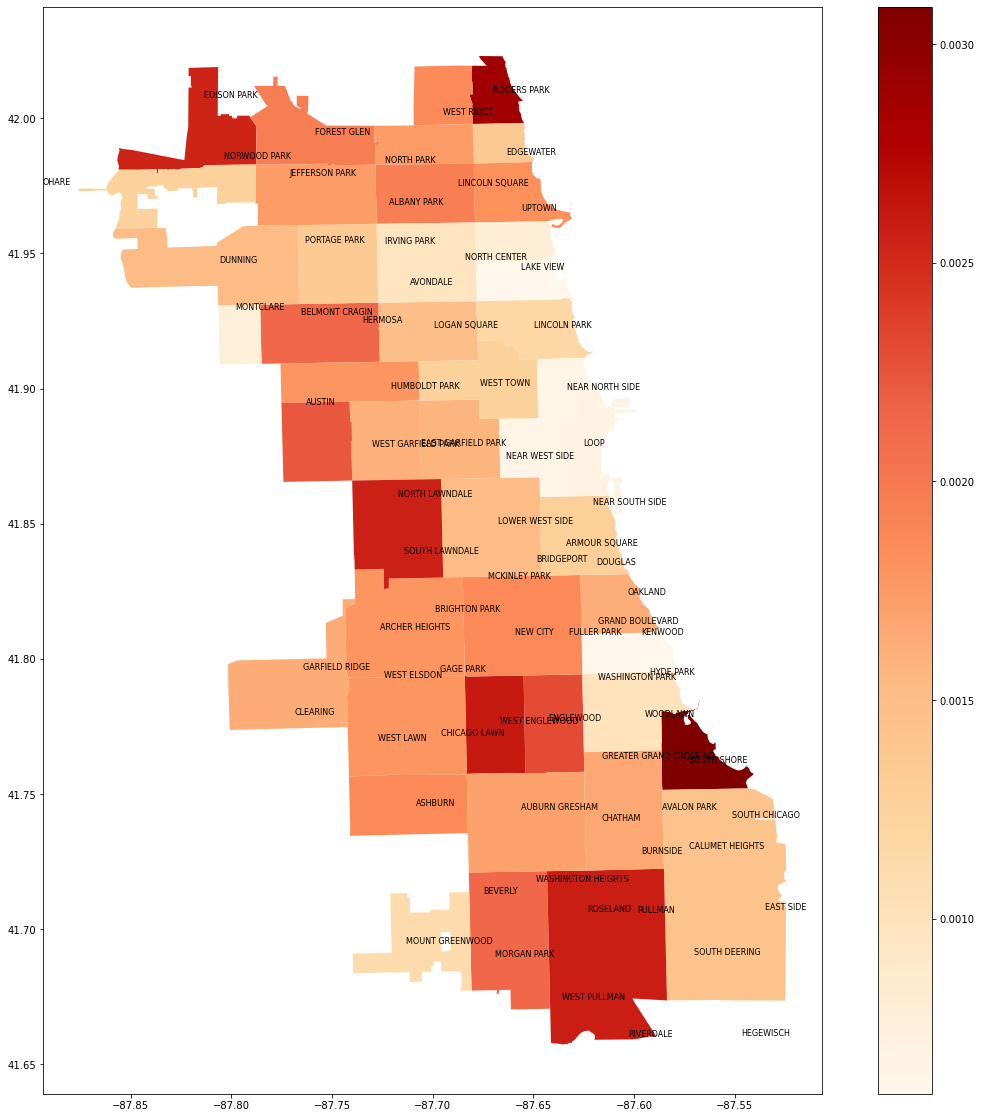

In [294]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_facecolor('white')
chicago_rates_zip.plot(ax=ax, column=chicago_rates_zip.death_rate, legend=True, cmap='OrRd')
texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["community"]):
    texts.append(plt.text(x, y, label, fontsize = 8))
plt.savefig('death_rates.png')

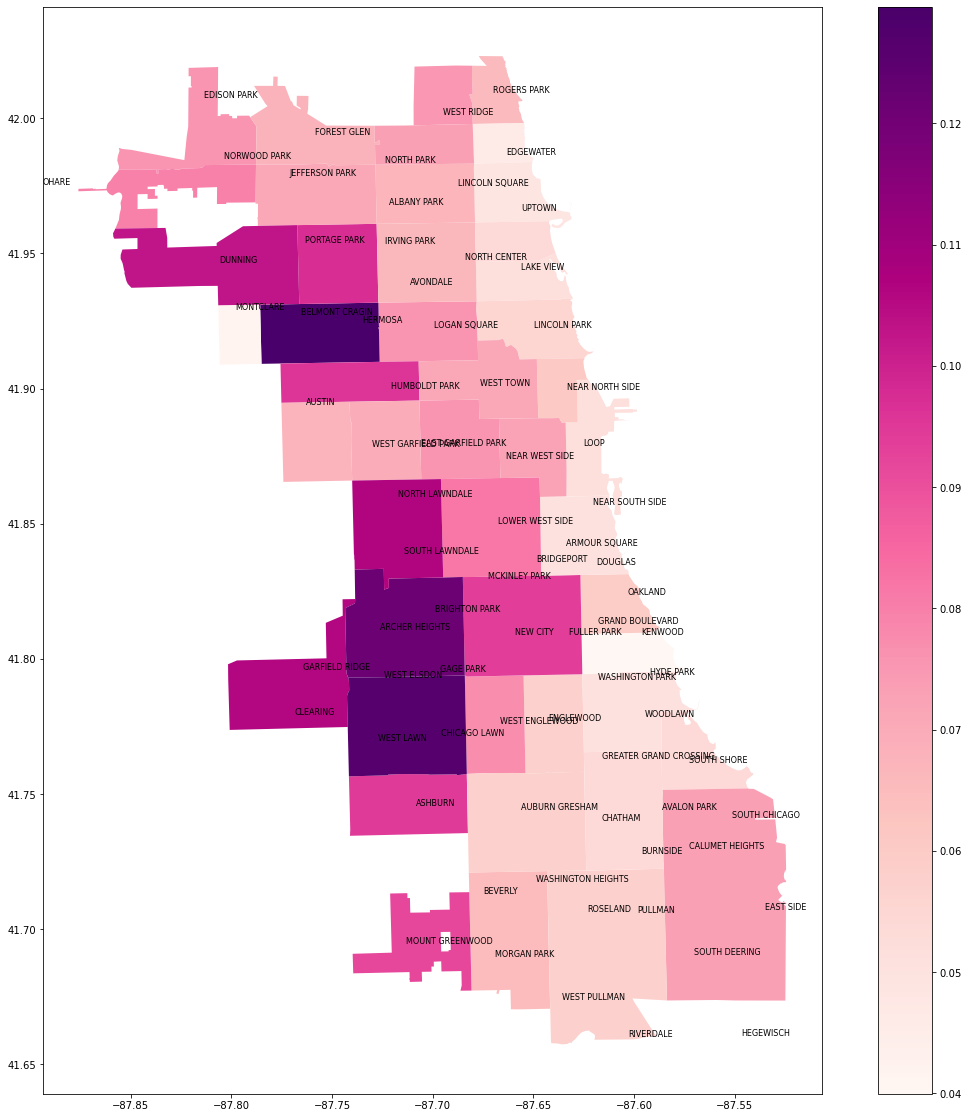

In [295]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_facecolor('white')
chicago_rates_zip.plot(ax=ax, column=chicago_rates_zip.case_rate, legend=True, cmap='RdPu')
texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["community"]):
    texts.append(plt.text(x, y, label, fontsize = 8))
plt.savefig('case_rates.png')